In [36]:
''' Computer side'''

import zmq
import io
from PIL import Image
import numpy as np

try: 
    context = zmq.Context()
    print('Connecting to server...')
    socket = context.socket(zmq.REQ)
    socket.connect("tcp://10.164.7.213:5555")
    print('Server connected')
 
    pic = open("pic_picam.png", "r+b")
    
    for request in range(5):
        print("Sending request n.%s..." % request)
        socket.send(b'Client camera request')

        image_stream = io.BytesIO()
        message = socket.recv()
        print("Received reply n.%s [ %s ]" % (request, len(message)))
        
        image_stream.write(message)
        image_stream.seek(0)

        image = Image.open(image_stream)        
        array = np.array(image.getdata()).reshape(image.size[1], image.size[0], 3)
        print(array.shape)

finally:         
    print('\nNo more requests, sending kill signal')
    socket.send(b'END')
    
    socket.close()
    context.term()
    print('\nSocket and context closed')

Connecting to server...
Server connected
Sending request n.0...
Received reply n.0 [ 176775 ]
(480, 640, 3)
Sending request n.1...
Received reply n.1 [ 176443 ]
(480, 640, 3)
Sending request n.2...
Received reply n.2 [ 176633 ]
(480, 640, 3)
Sending request n.3...
Received reply n.3 [ 175865 ]
(480, 640, 3)
Sending request n.4...
Received reply n.4 [ 176425 ]
(480, 640, 3)

No more requests, sending kill signal

Socket and context closed


In [2]:
import numpy as np


In [3]:

np.array(image.getdata()).reshape(image.size[0], image.size[1], 3).shape

(640, 480, 3)

Exception ignored in: <bound method Context.__del__ of <zmq.sugar.context.Context object at 0x7f81be618ac8>>
Traceback (most recent call last):
  File "/home/albert/.local/lib/python3.5/site-packages/zmq/sugar/context.py", line 46, in __del__
    self.term()
  File "zmq/backend/cython/context.pyx", line 136, in zmq.backend.cython.context.Context.term (zmq/backend/cython/context.c:2339)
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/context.c:3207)
KeyboardInterrupt


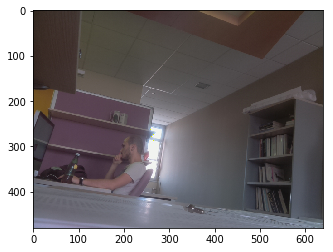

In [39]:
%matplotlib inline
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
img = plt.imshow(255-array*1.)
plt.savefig('unproc_fig.png', dpi=1000) #dpi=1000 output a high-quality file but greatly increase processing time

In [5]:
print(array.min(), array.max())

250